___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## 1. Import Modules, Load Data and Data Review

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
auto = pd.read_pickle("golden_data_dummy.pkl")

In [3]:
auto.shape

(14990, 136)

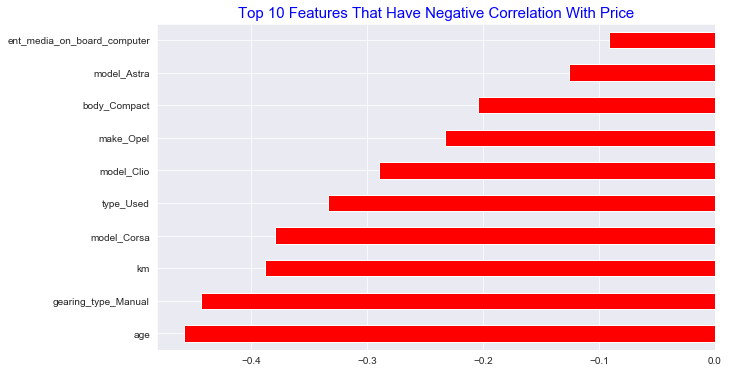

In [10]:
sns.set_style("darkgrid")
auto.corr()["price"].sort_values().head(10).plot.barh(figsize=(10,6), color="red")
plt.title("Top 10 Features That Have Negative Correlation With Price", {"color":"blue", "fontsize":15});

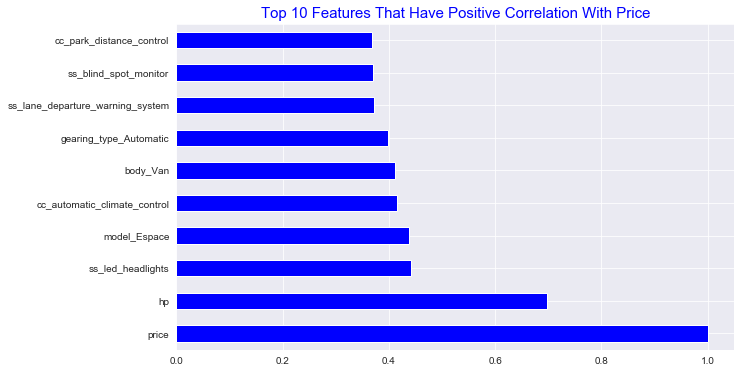

In [11]:
auto.corr()["price"].sort_values(ascending=False).head(10).plot.barh(figsize=(10,6), color="blue")
plt.title("Top 10 Features That Have Positive Correlation With Price", {"color":"blue", "fontsize":15});

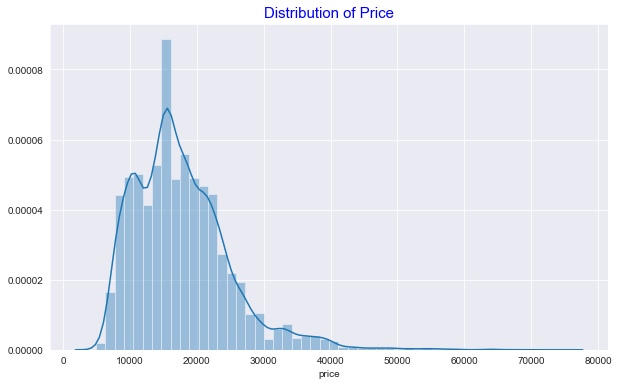

In [12]:
plt.figure(figsize=(10,6))
sns.distplot(auto["price"], bins=50)
plt.title("Distribution of Price", {"color":"blue", "fontsize":15});

## 2. Data Pre-Processing

In [7]:
X = auto.drop("price", axis=1)

y = auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

## 3. Implement Linear Regression

In [8]:
from sklearn.linear_model import LinearRegression

In [9]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [10]:
coef_lm = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coef_lm.sort_values(by=["Coefficient"], ascending=False)

,Coefficient
model_A2,5558.646846
model_Espace,3524.159675
make_Audi,2843.001737
cc_heads_up_display,2163.632146
gearing_type_Semi-automatic,2011.730502
...,...
fuel_electric,-2182.235853
make_Opel,-2241.619730
model_Corsa,-2388.706311
model_Clio,-4125.541682


In [11]:
y_pred = lm.predict(X_test)

In [12]:
from sklearn import metrics

In [13]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.8824154541427274
MAE : 1689.3532442989738
MSE : 6019220.512007881
RMSE : 2453.4099763406607


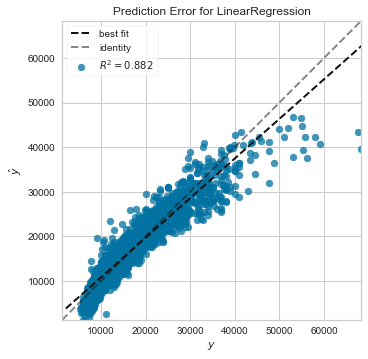

In [14]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test)  
visualizer.show()                 

-----

##### Cross Validation

In [15]:
from sklearn.model_selection import cross_val_score

In [16]:
score = cross_val_score(lm, X_train, y_train, cv=10)
score.mean()

0.8895148488108365

## 4. Implement Ridge Regression

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV

In [18]:
scaler = StandardScaler()

In [19]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [20]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

------------

In [21]:
ridge = Ridge()

In [22]:
ridge.fit(X_train_scaled, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [23]:
y_pred = ridge.predict(X_test_scaled)

In [24]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.8824132638053824
MAE : 1689.3356550188764
MSE : 6019332.636635987
RMSE : 2453.432827007087


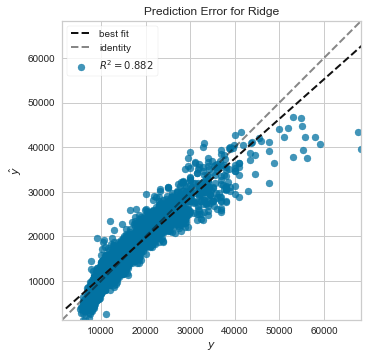

In [25]:
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(ridge)
visualizer.fit(X_train_scaled, y_train)  
visualizer.score(X_test_scaled, y_test)  
visualizer.show()       

------------

##### RidgeCV

In [26]:
ridge_cv = RidgeCV(alphas=np.linspace(0.1,50,100), cv=10)
ridge_cv.fit(X_train_scaled, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.6040404 ,  1.10808081,  1.61212121,  2.11616162,
        2.62020202,  3.12424242,  3.62828283,  4.13232323,  4.63636364,
        5.14040404,  5.64444444,  6.14848485,  6.65252525,  7.15656566,
        7.66060606,  8.16464646,  8.66868687,  9.17272727,  9.67676768,
       10.18080808, 10.68484848, 11.18888889, 11.69292929, 12.1969697 ,
       12.7010101 , 13.20505051, 13.70909091, 14.21313131, 14.7171717...
       37.9030303 , 38.40707071, 38.91111111, 39.41515152, 39.91919192,
       40.42323232, 40.92727273, 41.43131313, 41.93535354, 42.43939394,
       42.94343434, 43.44747475, 43.95151515, 44.45555556, 44.95959596,
       45.46363636, 45.96767677, 46.47171717, 46.97575758, 47.47979798,
       47.98383838, 48.48787879, 48.99191919, 49.4959596 , 50.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
        store_cv_values=False)

In [27]:
ridge_cv.alpha_

34.37474747474748

In [28]:
from yellowbrick.regressor import ManualAlphaSelection

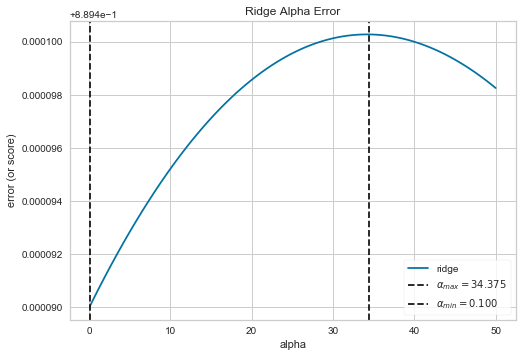

In [29]:
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=np.linspace(0.1,50,100),
    cv=10,
)

visualizer.fit(X_train_scaled, y_train)
visualizer.show()

In [30]:
y_pred = ridge_cv.predict(X_test_scaled)

In [31]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.8823334721357265
MAE : 1688.8020000711438
MSE : 6023417.21808484
RMSE : 2454.2651075392896


--------

##### Cross Validation

In [32]:
ridge = Ridge(alpha=ridge_cv.alpha_)
score = cross_val_score(ridge, X_train_scaled, y_train, cv=10)
score.mean()

0.8895002687214694

## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [33]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [34]:
lasso = Lasso()
lasso.fit(X_train_scaled, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [35]:
y_pred = lasso.predict(X_test_scaled)

In [36]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.8824637319798776
MAE : 1688.5666968442715
MSE : 6016749.1417650385
RMSE : 2452.9062643658112


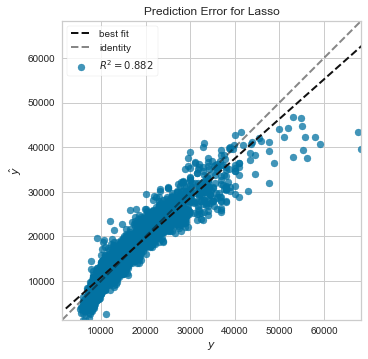

In [37]:
from yellowbrick.regressor import PredictionError

visualizer = PredictionError(lasso)
visualizer.fit(X_train_scaled, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)  # Evaluate the model on the test data
visualizer.show()    

----------

##### Cross Validation

In [38]:
score = cross_val_score(lasso, X_train_scaled, y_train, cv=10)
score.mean()

0.8895466283217143

------------

##### LassoCV

In [39]:
lasso_cv = LassoCV(alphas=np.linspace(0.1,50,100), cv=10)
lasso_cv.fit(X_train_scaled, y_train)

LassoCV(alphas=array([ 0.1       ,  0.6040404 ,  1.10808081,  1.61212121,  2.11616162,
        2.62020202,  3.12424242,  3.62828283,  4.13232323,  4.63636364,
        5.14040404,  5.64444444,  6.14848485,  6.65252525,  7.15656566,
        7.66060606,  8.16464646,  8.66868687,  9.17272727,  9.67676768,
       10.18080808, 10.68484848, 11.18888889, 11.69292929, 12.1969697 ,
       12.7010101 , 13.20505051, 13.70909091, 14.21313131, 14.7171717...
       42.94343434, 43.44747475, 43.95151515, 44.45555556, 44.95959596,
       45.46363636, 45.96767677, 46.47171717, 46.97575758, 47.47979798,
       47.98383838, 48.48787879, 48.99191919, 49.4959596 , 50.        ]),
        copy_X=True, cv=10, eps=0.001, fit_intercept=True, max_iter=1000,
        n_alphas=100, n_jobs=None, normalize=False, positive=False,
        precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
        verbose=False)

In [40]:
lasso_cv.alpha_

4.636363636363637

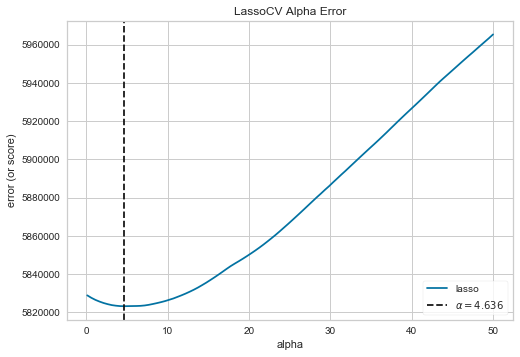

In [41]:
from yellowbrick.regressor import AlphaSelection
model = LassoCV(alphas=np.linspace(0.1,50,100), cv=10)
visualizer = AlphaSelection(model)
visualizer.fit(X_train_scaled, y_train)
visualizer.show()

In [42]:
df = pd.DataFrame(lasso_cv.coef_, X.columns, columns=["Coefficient"])

In [43]:
df[df["Coefficient"] != 0].sort_values(by=["Coefficient"], ascending=False)

,Coefficient
hp,2542.829198
make_Audi,1360.999868
model_Espace,1219.294166
model_A3,487.359921
type_Demonstration,476.475714
...,...
gearing_type_Manual,-824.822755
model_Clio,-878.264765
model_Corsa,-925.099513
km,-1376.786061


In [44]:
df[df["Coefficient"] == 0].sort_values(by=["Coefficient"], ascending=False)

,Coefficient
ss_head_airbag,-0.0
cc_electric_tailgate,0.0
cc_seat_heating,-0.0
cc_tinted_windows,-0.0
make_Opel,-0.0
make_Renault,-0.0
model_A1,0.0
body_Compact,0.0
body_color_Black,0.0
gearing_type_Automatic,0.0


In [45]:
y_pred = lasso_cv.predict(X_test_scaled)

In [47]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.882554592410908
MAE : 1686.14095747725
MSE : 6012097.944057041
RMSE : 2451.9579817070767


---------

##### Cross Validation

In [48]:
lasso = Lasso(4.636363636363637)
score = cross_val_score(lasso, X_train_scaled, y_train, cv=10)
score.mean()

0.8896153600696894

---------

In [49]:
X.shape

(14990, 135)

In [50]:
X_las = X.drop(df[df["Coefficient"] == 0].index, axis=1)

In [51]:
X_las.shape

(14990, 123)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_las, y, test_size=0.25, random_state=101)

In [53]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
lasso_feat = Lasso(alpha=lasso_cv.alpha_)

In [60]:
lasso_feat.fit(X_train_scaled, y_train)

Lasso(alpha=4.636363636363637, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [61]:
y_pred = lasso_feat.predict(X_test_scaled)

In [62]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.8825545925872089
MAE : 1686.140954837862
MSE : 6012097.935032093
RMSE : 2451.9579798667214


------

In [63]:
score  = cross_val_score(lasso_feat, X_train_scaled, y_train, cv=10)
score.mean()

0.8896815246426917

## Conclusion

---------

## Random Forest 

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [65]:
X = auto.drop("price", axis=1)

y = auto["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [66]:
regressor = RandomForestRegressor()
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [67]:
y_pred = regressor.predict(X_test)

In [68]:
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.952420159055805
MAE : 879.8221338063286
MSE : 2435639.415718828
RMSE : 1560.6535219960988


In [72]:
importance = regressor.feature_importances_

In [74]:
for i in range(len(importance)):
    print(X.columns[i], "=","%.5f" %importance[i])

displacement = 0.01920
hp = 0.44257
km = 0.06714
ss_abs = 0.00030
ss_adaptive_cruise_control = 0.00056
ss_adaptive_headlights = 0.00044
ss_alarm_system = 0.00096
ss_blind_spot_monitor = 0.00045
ss_central_door_lock = 0.00040
ss_central_door_lock_with_remote_control = 0.00022
ss_daytime_running_lights = 0.00047
ss_driver_drowsiness_detection = 0.00015
ss_driver_side_airbag = 0.00023
ss_electronic_stability_control = 0.00037
ss_emergency_brake_assistant = 0.00044
ss_emergency_system = 0.00027
ss_fog_lights = 0.00057
ss_head_airbag = 0.00017
ss_immobilizer = 0.00053
ss_isofix = 0.00107
ss_led_daytime_running_lights = 0.00055
ss_led_headlights = 0.00141
ss_lane_departure_warning_system = 0.00055
ss_night_view_assist = 0.00005
ss_passenger_side_airbag = 0.00018
ss_power_steering = 0.00109
ss_rear_airbag = 0.00037
ss_side_airbag = 0.00031
ss_tire_pressure_monitoring_system = 0.00049
ss_traction_control = 0.00044
ss_traffic_sign_recognition = 0.00033
ss_xenon_headlights = 0.00061
consumption_

-------

##### Cross Validation

In [70]:
score  = cross_val_score(regressor, X_train, y_train, cv=10)
score.mean()

0.9527997879890819

-------

## Final Conclusion

In [ ]:
Random Forest shows less RMSE to compare with other models.
It enables us to use more important features. I will use important features and guess new score and error metrics.
Finally I will save the model.

----

## Feature Selection

In [75]:
sel = SelectFromModel(regressor)
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                                criterion='mse', max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                max_samples=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=100, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                war

In [76]:
sel.get_support()

array([ True,  True,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False,  True,  True, False, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False,

In [77]:
selected_feat = X_train.columns[(sel.get_support())]
selected_feat

Index(['displacement', 'hp', 'km', 'consumption_comb', 'age',
       'cc_park_distance_control', 'make_Audi', 'model_A3', 'model_Astra',
       'model_Espace', 'model_Insignia', 'gearing_type_Manual'],
      dtype='object')

------

In [80]:
auto2 = pd.read_pickle("golden_data_not_dummy.pkl")

In [81]:
auto2.head()

,displacement,make,model,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,...,cc_split_rear_seats,cc_start_stop_system,cc_sunroof,cc_tinted_windows,cc_wind_deflector,cc_windshield,ext_alloy_wheels,ext_touch_screen,ext_trailer_hitch,ext_voice_control
0,1422.0,Audi,A1,66.0,56013,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
1,1798.0,Audi,A1,141.0,80000,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,1598.0,Audi,A1,85.0,83450,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1422.0,Audi,A1,66.0,73000,1.0,0.0,0.0,1.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,1422.0,Audi,A1,66.0,16200,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [83]:
df = auto2[["hp", "km", "age", "model", "price"]]
df = pd.get_dummies(df)

In [84]:
df.head()

,hp,km,age,price,model_A1,model_A2,model_A3,model_Astra,model_Clio,model_Corsa,model_Espace,model_Insignia
0,66.0,56013,3,15770,1,0,0,0,0,0,0,0
1,141.0,80000,2,14500,1,0,0,0,0,0,0,0
2,85.0,83450,3,14640,1,0,0,0,0,0,0,0
3,66.0,73000,3,14500,1,0,0,0,0,0,0,0
4,66.0,16200,3,16790,1,0,0,0,0,0,0,0


In [85]:
X = df.drop("price" , axis=1)

y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [86]:
lm = LinearRegression()
lm.fit(X_train,y_train)
y_pred = lm.predict(X_test)
print("R2 score :", metrics.r2_score(y_test, y_pred))
print("MAE :", metrics.mean_absolute_error(y_test, y_pred))
print("MSE :", metrics.mean_squared_error(y_test, y_pred))
print("RMSE :", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R2 score : 0.8363854148776577
MAE : 2038.0272963902817
MSE : 8272301.288493898
RMSE : 2876.1608592868893


In [87]:
import pickle
pickle.dump(lm, open("auto_model", 'wb'))